# LR - Tiktok

In [ ]:
import sys
import os
import pandas as pd

# Agregar el directorio raiz al PYTHONPATH
module_path = os.path.abspath(os.path.join('../..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [ ]:
from src.trainers.train_lr import train_lr
from src.trainers.utils import build_datasets, save_metrics
from constants.constants_tiktok import TIKTOK_DATASET_SENTENCES, TIKTOK_LR_METRICS_PATH

dataset_train, dataset_test, dataset_val = build_datasets(
    TIKTOK_DATASET_SENTENCES,
    test_size=0.3,
    val_size=0.5, # 0.5 de 0.3    
    random_state=42
)
print(dataset_train.shape)
print(dataset_test.shape)
print(dataset_val.shape)

## Hiperparámetros

In [12]:
import numpy as np

list_solver_l2 = ["lbfgs", "saga"]
list_solver_l1 = ["saga"]
list_vectorizers = ["tfidf", "bow"]
list_C = np.logspace(-4, 0, 20)
print(list_C)

[1.00000000e-04 1.62377674e-04 2.63665090e-04 4.28133240e-04
 6.95192796e-04 1.12883789e-03 1.83298071e-03 2.97635144e-03
 4.83293024e-03 7.84759970e-03 1.27427499e-02 2.06913808e-02
 3.35981829e-02 5.45559478e-02 8.85866790e-02 1.43844989e-01
 2.33572147e-01 3.79269019e-01 6.15848211e-01 1.00000000e+00]


In [13]:
best_accuracy = -1

## Penalty L2

In [14]:
from src.trainers.utils import save_model
from constants.constants_tiktok import LR_PIPELINE_PATH

for vectorizer in list_vectorizers:
    for solver in list_solver_l2:
        for C in list_C:
            pipeline, metrics = train_lr(
                dataset_train,
                dataset_val,
                vec=vectorizer,
                penalty="l2",
                C=C,
                solver=solver,
                max_iter=1000
            )
            print(f"LR {vectorizer} l2 {solver} {C}: {metrics['accuracy']}")
            save_metrics(metrics, TIKTOK_LR_METRICS_PATH)
            if metrics['accuracy'] > best_accuracy:
                best_accuracy = metrics['accuracy']
                save_model(pipeline, LR_PIPELINE_PATH)

c:\Users\Diego\anaconda3\envs\tensorflow_pytorch\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LR tfidf l2 lbfgs 0.0001: 0.6454792658055745
Modelo guardado en: c:\Users\Diego\Desktop\sentiment_analysis\models\tiktok\classifiers\lr_pipeline.pkl


c:\Users\Diego\anaconda3\envs\tensorflow_pytorch\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LR tfidf l2 lbfgs 0.0001623776739188721: 0.6403806934058464


c:\Users\Diego\anaconda3\envs\tensorflow_pytorch\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LR tfidf l2 lbfgs 0.00026366508987303583: 0.623725356900068


c:\Users\Diego\anaconda3\envs\tensorflow_pytorch\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LR tfidf l2 lbfgs 0.00042813323987193956: 0.63256288239293


c:\Users\Diego\anaconda3\envs\tensorflow_pytorch\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LR tfidf l2 lbfgs 0.0006951927961775605: 0.6329027872195785
LR tfidf l2 lbfgs 0.0011288378916846883: 0.6335825968728755


c:\Users\Diego\anaconda3\envs\tensorflow_pytorch\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\Diego\anaconda3\envs\tensorflow_pytorch\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\Diego\anaconda3\envs\tensorflow_pytorch\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LR tfidf l2 lbfgs 0.0018329807108324356: 0.6342624065261727
LR tfidf l2 lbfgs 0.002976351441631319: 0.6359619306594153


c:\Users\Diego\anaconda3\envs\tensorflow_pytorch\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\Diego\anaconda3\envs\tensorflow_pytorch\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LR tfidf l2 lbfgs 0.004832930238571752: 0.6363018354860639
LR tfidf l2 lbfgs 0.007847599703514606: 0.6390210740992522


c:\Users\Diego\anaconda3\envs\tensorflow_pytorch\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LR tfidf l2 lbfgs 0.012742749857031334: 0.6417403127124405


c:\Users\Diego\anaconda3\envs\tensorflow_pytorch\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LR tfidf l2 lbfgs 0.0206913808111479: 0.6444595513256288


c:\Users\Diego\anaconda3\envs\tensorflow_pytorch\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LR tfidf l2 lbfgs 0.03359818286283781: 0.6539768864717879
Modelo guardado en: c:\Users\Diego\Desktop\sentiment_analysis\models\tiktok\classifiers\lr_pipeline.pkl


c:\Users\Diego\anaconda3\envs\tensorflow_pytorch\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LR tfidf l2 lbfgs 0.05455594781168514: 0.6594153636981646
Modelo guardado en: c:\Users\Diego\Desktop\sentiment_analysis\models\tiktok\classifiers\lr_pipeline.pkl


c:\Users\Diego\anaconda3\envs\tensorflow_pytorch\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LR tfidf l2 lbfgs 0.08858667904100823: 0.668592794017675
Modelo guardado en: c:\Users\Diego\Desktop\sentiment_analysis\models\tiktok\classifiers\lr_pipeline.pkl


c:\Users\Diego\anaconda3\envs\tensorflow_pytorch\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LR tfidf l2 lbfgs 0.14384498882876628: 0.6753908905506458
Modelo guardado en: c:\Users\Diego\Desktop\sentiment_analysis\models\tiktok\classifiers\lr_pipeline.pkl


c:\Users\Diego\anaconda3\envs\tensorflow_pytorch\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LR tfidf l2 lbfgs 0.23357214690901212: 0.6835486063902108
Modelo guardado en: c:\Users\Diego\Desktop\sentiment_analysis\models\tiktok\classifiers\lr_pipeline.pkl


c:\Users\Diego\anaconda3\envs\tensorflow_pytorch\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LR tfidf l2 lbfgs 0.3792690190732246: 0.6923861318830727
Modelo guardado en: c:\Users\Diego\Desktop\sentiment_analysis\models\tiktok\classifiers\lr_pipeline.pkl


c:\Users\Diego\anaconda3\envs\tensorflow_pytorch\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LR tfidf l2 lbfgs 0.615848211066026: 0.6940856560163154
Modelo guardado en: c:\Users\Diego\Desktop\sentiment_analysis\models\tiktok\classifiers\lr_pipeline.pkl


c:\Users\Diego\anaconda3\envs\tensorflow_pytorch\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LR tfidf l2 lbfgs 1.0: 0.6944255608429639
Modelo guardado en: c:\Users\Diego\Desktop\sentiment_analysis\models\tiktok\classifiers\lr_pipeline.pkl


c:\Users\Diego\anaconda3\envs\tensorflow_pytorch\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LR tfidf l2 saga 0.0001: 0.6165873555404486


c:\Users\Diego\anaconda3\envs\tensorflow_pytorch\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LR tfidf l2 saga 0.0001623776739188721: 0.6397008837525493


c:\Users\Diego\anaconda3\envs\tensorflow_pytorch\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LR tfidf l2 saga 0.00026366508987303583: 0.6390210740992522


c:\Users\Diego\anaconda3\envs\tensorflow_pytorch\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LR tfidf l2 saga 0.00042813323987193956: 0.6397008837525493


c:\Users\Diego\anaconda3\envs\tensorflow_pytorch\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LR tfidf l2 saga 0.0006951927961775605: 0.6393609789259007


c:\Users\Diego\anaconda3\envs\tensorflow_pytorch\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LR tfidf l2 saga 0.0011288378916846883: 0.6397008837525493


c:\Users\Diego\anaconda3\envs\tensorflow_pytorch\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LR tfidf l2 saga 0.0018329807108324356: 0.6397008837525493


c:\Users\Diego\anaconda3\envs\tensorflow_pytorch\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LR tfidf l2 saga 0.002976351441631319: 0.6383412644459552


c:\Users\Diego\anaconda3\envs\tensorflow_pytorch\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LR tfidf l2 saga 0.004832930238571752: 0.6390210740992522


c:\Users\Diego\anaconda3\envs\tensorflow_pytorch\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LR tfidf l2 saga 0.007847599703514606: 0.6386811692726037


c:\Users\Diego\anaconda3\envs\tensorflow_pytorch\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LR tfidf l2 saga 0.012742749857031334: 0.641400407885792


c:\Users\Diego\anaconda3\envs\tensorflow_pytorch\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LR tfidf l2 saga 0.0206913808111479: 0.6451393609789259


c:\Users\Diego\anaconda3\envs\tensorflow_pytorch\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LR tfidf l2 saga 0.03359818286283781: 0.6553365057783821


c:\Users\Diego\anaconda3\envs\tensorflow_pytorch\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LR tfidf l2 saga 0.05455594781168514: 0.659075458871516


c:\Users\Diego\anaconda3\envs\tensorflow_pytorch\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LR tfidf l2 saga 0.08858667904100823: 0.668592794017675


c:\Users\Diego\anaconda3\envs\tensorflow_pytorch\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LR tfidf l2 saga 0.14384498882876628: 0.6764106050305915


c:\Users\Diego\anaconda3\envs\tensorflow_pytorch\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LR tfidf l2 saga 0.23357214690901212: 0.6835486063902108


c:\Users\Diego\anaconda3\envs\tensorflow_pytorch\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LR tfidf l2 saga 0.3792690190732246: 0.69068660774983


c:\Users\Diego\anaconda3\envs\tensorflow_pytorch\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LR tfidf l2 saga 0.615848211066026: 0.69068660774983


c:\Users\Diego\anaconda3\envs\tensorflow_pytorch\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LR tfidf l2 saga 1.0: 0.6944255608429639


c:\Users\Diego\anaconda3\envs\tensorflow_pytorch\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LR bow l2 lbfgs 0.0001: 0.5713800135961931


c:\Users\Diego\anaconda3\envs\tensorflow_pytorch\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LR bow l2 lbfgs 0.0001623776739188721: 0.5761386811692726


c:\Users\Diego\anaconda3\envs\tensorflow_pytorch\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LR bow l2 lbfgs 0.00026366508987303583: 0.5829367777022434


c:\Users\Diego\anaconda3\envs\tensorflow_pytorch\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LR bow l2 lbfgs 0.00042813323987193956: 0.5853161114887832


c:\Users\Diego\anaconda3\envs\tensorflow_pytorch\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LR bow l2 lbfgs 0.0006951927961775605: 0.592114208021754


c:\Users\Diego\anaconda3\envs\tensorflow_pytorch\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LR bow l2 lbfgs 0.0011288378916846883: 0.5992522093813732


c:\Users\Diego\anaconda3\envs\tensorflow_pytorch\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LR bow l2 lbfgs 0.0018329807108324356: 0.6074099252209382


c:\Users\Diego\anaconda3\envs\tensorflow_pytorch\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LR bow l2 lbfgs 0.002976351441631319: 0.6172671651937458


c:\Users\Diego\anaconda3\envs\tensorflow_pytorch\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LR bow l2 lbfgs 0.004832930238571752: 0.623725356900068


c:\Users\Diego\anaconda3\envs\tensorflow_pytorch\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LR bow l2 lbfgs 0.007847599703514606: 0.6390210740992522


c:\Users\Diego\anaconda3\envs\tensorflow_pytorch\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LR bow l2 lbfgs 0.012742749857031334: 0.6515975526852481


c:\Users\Diego\anaconda3\envs\tensorflow_pytorch\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LR bow l2 lbfgs 0.0206913808111479: 0.6611148878314073


c:\Users\Diego\anaconda3\envs\tensorflow_pytorch\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LR bow l2 lbfgs 0.03359818286283781: 0.6743711760707002


c:\Users\Diego\anaconda3\envs\tensorflow_pytorch\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LR bow l2 lbfgs 0.05455594781168514: 0.681169272603671


c:\Users\Diego\anaconda3\envs\tensorflow_pytorch\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LR bow l2 lbfgs 0.08858667904100823: 0.6872875594833446


c:\Users\Diego\anaconda3\envs\tensorflow_pytorch\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LR bow l2 lbfgs 0.14384498882876628: 0.6910265125764786


c:\Users\Diego\anaconda3\envs\tensorflow_pytorch\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LR bow l2 lbfgs 0.23357214690901212: 0.6974847042828008
Modelo guardado en: c:\Users\Diego\Desktop\sentiment_analysis\models\tiktok\classifiers\lr_pipeline.pkl


c:\Users\Diego\anaconda3\envs\tensorflow_pytorch\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LR bow l2 lbfgs 0.3792690190732246: 0.7019034670292318
Modelo guardado en: c:\Users\Diego\Desktop\sentiment_analysis\models\tiktok\classifiers\lr_pipeline.pkl


c:\Users\Diego\anaconda3\envs\tensorflow_pytorch\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LR bow l2 lbfgs 0.615848211066026: 0.7059823249490143
Modelo guardado en: c:\Users\Diego\Desktop\sentiment_analysis\models\tiktok\classifiers\lr_pipeline.pkl


c:\Users\Diego\anaconda3\envs\tensorflow_pytorch\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LR bow l2 lbfgs 1.0: 0.7056424201223658


c:\Users\Diego\anaconda3\envs\tensorflow_pytorch\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LR bow l2 saga 0.0001: 0.5880353501019715


c:\Users\Diego\anaconda3\envs\tensorflow_pytorch\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LR bow l2 saga 0.0001623776739188721: 0.5910944935418083


c:\Users\Diego\anaconda3\envs\tensorflow_pytorch\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LR bow l2 saga 0.00026366508987303583: 0.5941536369816451


c:\Users\Diego\anaconda3\envs\tensorflow_pytorch\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LR bow l2 saga 0.00042813323987193956: 0.5965329707681849


c:\Users\Diego\anaconda3\envs\tensorflow_pytorch\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LR bow l2 saga 0.0006951927961775605: 0.6070700203942896


c:\Users\Diego\anaconda3\envs\tensorflow_pytorch\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LR bow l2 saga 0.0011288378916846883: 0.6128484024473148


c:\Users\Diego\anaconda3\envs\tensorflow_pytorch\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LR bow l2 saga 0.0018329807108324356: 0.6182868796736913


c:\Users\Diego\anaconda3\envs\tensorflow_pytorch\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LR bow l2 saga 0.002976351441631319: 0.6250849762066621


c:\Users\Diego\anaconda3\envs\tensorflow_pytorch\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LR bow l2 saga 0.004832930238571752: 0.6335825968728755


c:\Users\Diego\anaconda3\envs\tensorflow_pytorch\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LR bow l2 saga 0.007847599703514606: 0.6458191706322229


c:\Users\Diego\anaconda3\envs\tensorflow_pytorch\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LR bow l2 saga 0.012742749857031334: 0.6556764106050306


c:\Users\Diego\anaconda3\envs\tensorflow_pytorch\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LR bow l2 saga 0.0206913808111479: 0.6628144119646499


c:\Users\Diego\anaconda3\envs\tensorflow_pytorch\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LR bow l2 saga 0.03359818286283781: 0.6753908905506458


c:\Users\Diego\anaconda3\envs\tensorflow_pytorch\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LR bow l2 saga 0.05455594781168514: 0.6804894629503739


c:\Users\Diego\anaconda3\envs\tensorflow_pytorch\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LR bow l2 saga 0.08858667904100823: 0.6879673691366417


c:\Users\Diego\anaconda3\envs\tensorflow_pytorch\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LR bow l2 saga 0.14384498882876628: 0.6913664174031271


c:\Users\Diego\anaconda3\envs\tensorflow_pytorch\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LR bow l2 saga 0.23357214690901212: 0.6991842284160436


c:\Users\Diego\anaconda3\envs\tensorflow_pytorch\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LR bow l2 saga 0.3792690190732246: 0.7015635622025833


c:\Users\Diego\anaconda3\envs\tensorflow_pytorch\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LR bow l2 saga 0.615848211066026: 0.7053025152957172


c:\Users\Diego\anaconda3\envs\tensorflow_pytorch\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LR bow l2 saga 1.0: 0.7036029911624745


c:\Users\Diego\anaconda3\envs\tensorflow_pytorch\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


## Penalty L1

In [15]:

for vectorizer in list_vectorizers:
    for solver in list_solver_l1:
        for C in list_C:
            pipeline, metrics = train_lr(
                dataset_train,
                dataset_val,
                vec=vectorizer,
                penalty="l1",
                C=C,
                solver=solver,
                max_iter=1000
            )
            print(f"LR {vectorizer} l1 {solver} {C}: {metrics['accuracy']}")
            save_metrics(metrics, TIKTOK_LR_METRICS_PATH)
            if metrics['accuracy'] > best_accuracy:
                best_accuracy = metrics['accuracy']
                save_model(pipeline, LR_PIPELINE_PATH)

c:\Users\Diego\anaconda3\envs\tensorflow_pytorch\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\Diego\anaconda3\envs\tensorflow_pytorch\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Diego\anaconda3\envs\tensorflow_pytorch\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LR tfidf l1 saga 0.0001: 0.33344663494221616
LR tfidf l1 saga 0.0001623776739188721: 0.33344663494221616


c:\Users\Diego\anaconda3\envs\tensorflow_pytorch\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Diego\anaconda3\envs\tensorflow_pytorch\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\Diego\anaconda3\envs\tensorflow_pytorch\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


LR tfidf l1 saga 0.00026366508987303583: 0.33344663494221616
LR tfidf l1 saga 0.00042813323987193956: 0.33344663494221616


c:\Users\Diego\anaconda3\envs\tensorflow_pytorch\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\Diego\anaconda3\envs\tensorflow_pytorch\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Diego\anaconda3\envs\tensorflow_pytorch\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LR tfidf l1 saga 0.0006951927961775605: 0.33310673011556763


c:\Users\Diego\anaconda3\envs\tensorflow_pytorch\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Diego\anaconda3\envs\tensorflow_pytorch\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LR tfidf l1 saga 0.0011288378916846883: 0.33344663494221616


c:\Users\Diego\anaconda3\envs\tensorflow_pytorch\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Diego\anaconda3\envs\tensorflow_pytorch\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LR tfidf l1 saga 0.0018329807108324356: 0.33344663494221616


c:\Users\Diego\anaconda3\envs\tensorflow_pytorch\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Diego\anaconda3\envs\tensorflow_pytorch\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LR tfidf l1 saga 0.002976351441631319: 0.33310673011556763


c:\Users\Diego\anaconda3\envs\tensorflow_pytorch\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Diego\anaconda3\envs\tensorflow_pytorch\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LR tfidf l1 saga 0.004832930238571752: 0.33310673011556763


c:\Users\Diego\anaconda3\envs\tensorflow_pytorch\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Diego\anaconda3\envs\tensorflow_pytorch\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LR tfidf l1 saga 0.007847599703514606: 0.33310673011556763


c:\Users\Diego\anaconda3\envs\tensorflow_pytorch\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Diego\anaconda3\envs\tensorflow_pytorch\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LR tfidf l1 saga 0.012742749857031334: 0.33344663494221616


c:\Users\Diego\anaconda3\envs\tensorflow_pytorch\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Diego\anaconda3\envs\tensorflow_pytorch\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LR tfidf l1 saga 0.0206913808111479: 0.33310673011556763
LR tfidf l1 saga 0.03359818286283781: 0.41298436437797414


c:\Users\Diego\anaconda3\envs\tensorflow_pytorch\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LR tfidf l1 saga 0.05455594781168514: 0.46091094493541807


c:\Users\Diego\anaconda3\envs\tensorflow_pytorch\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LR tfidf l1 saga 0.08858667904100823: 0.5210740992522094


c:\Users\Diego\anaconda3\envs\tensorflow_pytorch\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LR tfidf l1 saga 0.14384498882876628: 0.5734194425560843


c:\Users\Diego\anaconda3\envs\tensorflow_pytorch\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LR tfidf l1 saga 0.23357214690901212: 0.6142080217539089


c:\Users\Diego\anaconda3\envs\tensorflow_pytorch\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LR tfidf l1 saga 0.3792690190732246: 0.6505778382053025


c:\Users\Diego\anaconda3\envs\tensorflow_pytorch\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LR tfidf l1 saga 0.615848211066026: 0.6781101291638342


c:\Users\Diego\anaconda3\envs\tensorflow_pytorch\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LR tfidf l1 saga 1.0: 0.698844323589395
LR bow l1 saga 0.0001: 0.33310673011556763


c:\Users\Diego\anaconda3\envs\tensorflow_pytorch\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\Diego\anaconda3\envs\tensorflow_pytorch\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Diego\anaconda3\envs\tensorflow_pytorch\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\Diego\anaconda3\envs\te

LR bow l1 saga 0.0001623776739188721: 0.33310673011556763
LR bow l1 saga 0.00026366508987303583: 0.33310673011556763


c:\Users\Diego\anaconda3\envs\tensorflow_pytorch\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\Diego\anaconda3\envs\tensorflow_pytorch\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


LR bow l1 saga 0.00042813323987193956: 0.33344663494221616


c:\Users\Diego\anaconda3\envs\tensorflow_pytorch\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\Diego\anaconda3\envs\tensorflow_pytorch\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


LR bow l1 saga 0.0006951927961775605: 0.33344663494221616


c:\Users\Diego\anaconda3\envs\tensorflow_pytorch\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\Diego\anaconda3\envs\tensorflow_pytorch\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


LR bow l1 saga 0.0011288378916846883: 0.33344663494221616


c:\Users\Diego\anaconda3\envs\tensorflow_pytorch\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\Diego\anaconda3\envs\tensorflow_pytorch\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


LR bow l1 saga 0.0018329807108324356: 0.33344663494221616


c:\Users\Diego\anaconda3\envs\tensorflow_pytorch\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\Diego\anaconda3\envs\tensorflow_pytorch\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


LR bow l1 saga 0.002976351441631319: 0.33344663494221616


c:\Users\Diego\anaconda3\envs\tensorflow_pytorch\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\Diego\anaconda3\envs\tensorflow_pytorch\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


LR bow l1 saga 0.004832930238571752: 0.33310673011556763


c:\Users\Diego\anaconda3\envs\tensorflow_pytorch\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LR bow l1 saga 0.007847599703514606: 0.3653976886471788


c:\Users\Diego\anaconda3\envs\tensorflow_pytorch\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LR bow l1 saga 0.012742749857031334: 0.44085656016315433


c:\Users\Diego\anaconda3\envs\tensorflow_pytorch\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LR bow l1 saga 0.0206913808111479: 0.4847042828008158


c:\Users\Diego\anaconda3\envs\tensorflow_pytorch\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LR bow l1 saga 0.03359818286283781: 0.535350101971448


c:\Users\Diego\anaconda3\envs\tensorflow_pytorch\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LR bow l1 saga 0.05455594781168514: 0.5788579197824609


c:\Users\Diego\anaconda3\envs\tensorflow_pytorch\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LR bow l1 saga 0.08858667904100823: 0.6142080217539089


c:\Users\Diego\anaconda3\envs\tensorflow_pytorch\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LR bow l1 saga 0.14384498882876628: 0.641400407885792


c:\Users\Diego\anaconda3\envs\tensorflow_pytorch\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LR bow l1 saga 0.23357214690901212: 0.6706322229775663


c:\Users\Diego\anaconda3\envs\tensorflow_pytorch\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\Diego\anaconda3\envs\tensorflow_pytorch\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\Diego\anaconda3\envs\tensorflow_pytorch\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LR bow l1 saga 0.3792690190732246: 0.6859279401767505


c:\Users\Diego\anaconda3\envs\tensorflow_pytorch\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\Diego\anaconda3\envs\tensorflow_pytorch\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LR bow l1 saga 0.615848211066026: 0.698844323589395
LR bow l1 saga 1.0: 0.7005438477226377


c:\Users\Diego\anaconda3\envs\tensorflow_pytorch\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


## Modelo con mayor accurary

In [16]:
# Seleccionar los hiperparámetros que generan mayor accuracy
df_metrics = pd.read_csv(TIKTOK_LR_METRICS_PATH)

best_acc = df_metrics.loc[df_metrics['accuracy'].idxmax()]
print(best_acc)
print(best_accuracy)

accuracy          0.705982
recall            0.705969
precision         0.711184
f1_score          0.707231
model                   LR
vectorizer             BOW
penalty                 l2
regularization    0.615848
max_iter              1000
solver               lbfgs
vocab_size            9046
train_time        0.707812
Name: 58, dtype: object
0.7059823249490143


Cargando modelo: c:\Users\Diego\Desktop\sentiment_analysis\models\tiktok\classifiers\lr_pipeline.pkl

Logistic Regression
Reporte de clasificacion
              precision    recall  f1-score   support

           0       0.66      0.75      0.70       864
           1       0.68      0.59      0.63      1123
           2       0.75      0.77      0.76       955

    accuracy                           0.70      2942
   macro avg       0.70      0.70      0.70      2942
weighted avg       0.70      0.70      0.69      2942

Matriz de confusión


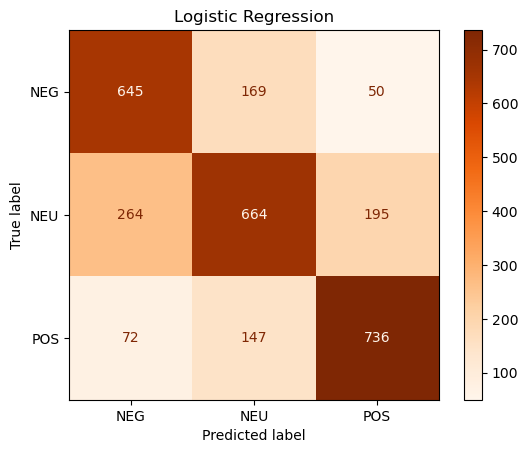

{'accuracy': 0.6951053704962611, 'recall': 0.6950994057153953, 'precision': 0.7028272603129068, 'f1_score': 0.6969988033783499}


In [17]:
from src.trainers.utils import evaluate_model
from src.trainers.utils import load_model

# Evaluar modelo con datos de prueba
pipeline = load_model(LR_PIPELINE_PATH)
metrics = evaluate_model(pipeline, dataset_test, title="Logistic Regression")
print(metrics)